In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [76]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [77]:
print(train.shape, test.shape)

(31552, 21) (13659, 20)


In [182]:
train.head()

,Role,Invested in Real Estate,Extra Hours,Invested in Stock Market,Favourite Sport,Gender,Languages Known,Sport Knowledge (in XP),Average no. of leaves/month,Trades Done,...,Level of Education,Occupation,Pay,ID Proof,Most Productive Hour,Tax Category,Income Category,Employer,Tax Paid,Id
0,Part-time,NaN,Paid,Tesla,swimming,female,1,NaN,2,56,...,Masters,0,2416.73,Driving License,8,258,2.0,NaN,29597,0
1,Full-time,Ocean Side,Paid,Tesla,cricket,female,3,2.0,0,42,...,Graduation,4,302.73,Driving License,8,148,2.0,Vision-Analytics,49218,1
2,Full-time,Ocean Side,Unpaid,Tesla,soccer,male,3,35.0,4,31,...,Graduation,8,275.73,Driving License,8,73,2.0,Vision-Analytics,14764,2
3,Full-time,Ocean Side,Paid,Tesla,polo,female,4,70.0,1,45,...,NaN,7,1779.73,Driving License,8,89,2.0,Vision-Analytics,46868,3
4,Part-time,Country Side,Paid,Tesla,soccer,male,3,25.0,5,31,...,NaN,11,274.73,Driving License,8,195,2.0,Vision-Analytics,21859,4


In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31552 entries, 0 to 31551
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Role                         31552 non-null  object 
 1   Invested in Real Estate      27632 non-null  object 
 2   Extra Hours                  31552 non-null  object 
 3   Invested in Stock Market     31552 non-null  object 
 4   Favourite Sport              27625 non-null  object 
 5   Gender                       31552 non-null  object 
 6   Languages Known              31552 non-null  int64  
 7   Sport Knowledge (in XP)      27200 non-null  float64
 8   Average no. of leaves/month  31552 non-null  int64  
 9   Trades Done                  31552 non-null  int64  
 10  Married(1/0)                 31552 non-null  int64  
 11  Level of Education           30259 non-null  object 
 12  Occupation                   31552 non-null  int64  
 13  Pay             

In [183]:
y_train = train['Occupation']

In [80]:
train['Occupation'].value_counts()
# targets = [0, 1, 2, 3, ..., 11] len = 12
# frequencies are biased

7     6772
0     6617
4     5276
3     3594
6     2917
10    1582
1     1112
8     1050
2      903
9      861
5      661
11     207
Name: Occupation, dtype: int64

In [81]:
train.columns

Index(['Role', 'Invested in Real Estate', 'Extra Hours',
       'Invested in Stock Market', 'Favourite Sport', 'Gender',
       'Languages Known', 'Sport Knowledge (in XP)',
       'Average no. of leaves/month', 'Trades Done', 'Married(1/0)',
       'Level of Education', 'Occupation', 'Pay', 'ID Proof',
       'Most Productive Hour', 'Tax Category', 'Income Category', 'Employer',
       'Tax Paid', 'Id'],
      dtype='object')

In [101]:
data = pd.concat([train.drop('Occupation', axis = 1), test]).reset_index()
data

,index,Role,Invested in Real Estate,Extra Hours,Invested in Stock Market,Favourite Sport,Gender,Languages Known,Sport Knowledge (in XP),Average no. of leaves/month,...,Married(1/0),Level of Education,Pay,ID Proof,Most Productive Hour,Tax Category,Income Category,Employer,Tax Paid,Id
0,0,Part-time,NaN,Paid,Tesla,swimming,female,1,NaN,2,...,0,Masters,2416.73,Driving License,8,258,2.0,NaN,29597,0
1,1,Full-time,Ocean Side,Paid,Tesla,cricket,female,3,2.0,0,...,1,Graduation,302.73,Driving License,8,148,2.0,Vision-Analytics,49218,1
2,2,Full-time,Ocean Side,Unpaid,Tesla,soccer,male,3,35.0,4,...,0,Graduation,275.73,Driving License,8,73,2.0,Vision-Analytics,14764,2
3,3,Full-time,Ocean Side,Paid,Tesla,polo,female,4,70.0,1,...,0,NaN,1779.73,Driving License,8,89,2.0,Vision-Analytics,46868,3
4,4,Part-time,Country Side,Paid,Tesla,soccer,male,3,25.0,5,...,1,NaN,274.73,Driving License,8,195,2.0,Vision-Analytics,21859,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,13654,Part-time,Ocean Side,Paid,Jio,swimming,male,4,36.0,5,...,-1,Masters,4083.73,Aadhar,9,259,3.0,Vision-Analytics,16241,45191
45207,13655,Part-time,NaN,Paid,Jio,None,male,3,1.0,0,...,1,Masters,1038.73,Aadhar,9,235,2.0,NaN,25361,45192
45208,13656,Full-time,Country Side,Unpaid,Jio,cricket,male,1,48.0,1,...,1,Masters,NaN,Aadhar,9,446,6.0,Vision-Analytics,15414,45193
45209,13657,Full-time,Country Side,Paid,Jio,basketball,female,1,15.0,0,...,0,Masters,856.73,Aadhar,9,223,6.0,Vision-Analytics,31697,45201


In [102]:
print('Categorical features:')
print(data.dtypes[data.dtypes == 'object'].index)
print('Numeric features:')
print(data.dtypes[data.dtypes != 'object'].index)

Categorical features:
Index(['Role', 'Invested in Real Estate', 'Extra Hours',
       'Invested in Stock Market', 'Favourite Sport', 'Gender',
       'Level of Education', 'ID Proof', 'Employer'],
      dtype='object')
Numeric features:
Index(['index', 'Languages Known', 'Sport Knowledge (in XP)',
       'Average no. of leaves/month', 'Trades Done', 'Married(1/0)', 'Pay',
       'Most Productive Hour', 'Tax Category', 'Income Category', 'Tax Paid',
       'Id'],
      dtype='object')


In [103]:
# Missing values
data.isna().sum().sort_values(ascending = False)[:10]

Employer                   6459
Sport Knowledge (in XP)    6234
Invested in Real Estate    5652
Favourite Sport            5596
Pay                        2618
Level of Education         1857
Income Category            1329
index                         0
Tax Paid                      0
Tax Category                  0
dtype: int64

In [104]:
yes = data.isna().sum() > 0
missing_cols = yes[yes == True].index
print('Missing columns: ')
print(missing_cols)

Missing columns: 
Index(['Invested in Real Estate', 'Favourite Sport', 'Sport Knowledge (in XP)',
       'Level of Education', 'Pay', 'Income Category', 'Employer'],
      dtype='object')


In [105]:
# EDA

/home/nachiket/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

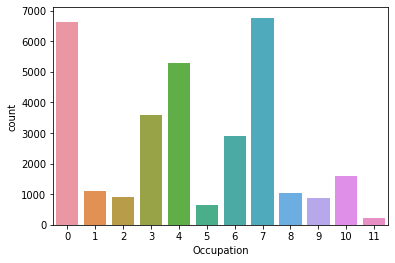

In [107]:
sns.countplot(train['Occupation'])

In [108]:
numerical_feats = data.dtypes[data.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = data.dtypes[data.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))


Number of Numerical features:  12
Number of Categorical features:  9


In [109]:
for cat in categorical_feats:
    print(data[cat].value_counts().sort_values(ascending = False))
    print('\n\n')

Full-time    22745
Part-time    22466
Name: Role, dtype: int64



Ocean Side      21957
Country Side    17602
Name: Invested in Real Estate, dtype: int64



Paid      36841
Unpaid     8370
Name: Extra Hours, dtype: int64



Tesla    39922
Jio       5289
Name: Invested in Stock Market, dtype: int64



swimming      5761
polo          5714
soccer        5651
None          5632
badminton     5631
basketball    5629
cricket       5597
Name: Favourite Sport, dtype: int64



female    22671
male      22540
Name: Gender, dtype: int64



Graduation     23202
Masters        13301
High School     6851
Name: Level of Education, dtype: int64



Aadhar             29285
Driving License    13020
PAN                 2906
Name: ID Proof, dtype: int64



Vision-Analytics    38752
Name: Employer, dtype: int64





In [119]:
for cat in categorical_feats:
    s = data[cat].value_counts(normalize = True)
    missing = data[cat].isnull()
    data.loc[missing,cat] = np.random.choice(s.index, size=len(data[missing]),p=s.values)
    print('\n\n')

In [120]:
data.isna().sum()

index                             0
Role                              0
Invested in Real Estate           0
Extra Hours                       0
Invested in Stock Market          0
Favourite Sport                   0
Gender                            0
Languages Known                   0
Sport Knowledge (in XP)        6234
Average no. of leaves/month       0
Trades Done                       0
Married(1/0)                      0
Level of Education                0
Pay                            2618
ID Proof                          0
Most Productive Hour              0
Tax Category                      0
Income Category                1329
Employer                          0
Tax Paid                          0
Id                                0
dtype: int64

In [121]:
for cat in categorical_feats:
    print(data[cat].value_counts().sort_values(ascending = False))
    print('\n\n')

Full-time    22745
Part-time    22466
Name: Role, dtype: int64



Ocean Side      25071
Country Side    20140
Name: Invested in Real Estate, dtype: int64



Paid      36841
Unpaid     8370
Name: Extra Hours, dtype: int64



Tesla    39922
Jio       5289
Name: Invested in Stock Market, dtype: int64



swimming      6578
polo          6539
soccer        6437
None          6430
cricket       6416
badminton     6411
basketball    6400
Name: Favourite Sport, dtype: int64



female    22671
male      22540
Name: Gender, dtype: int64



Graduation     24203
Masters        13889
High School     7119
Name: Level of Education, dtype: int64



Aadhar             29285
Driving License    13020
PAN                 2906
Name: ID Proof, dtype: int64



Vision-Analytics    45211
Name: Employer, dtype: int64





In [130]:
cols = data.isna().sum().sort_values(ascending = False)[:3].index
for col in cols:
    print('\n\n\n')
    print(data[col].value_counts())





2.0     442
10.0    431
0.0     429
89.0    429
36.0    428
       ... 
49.0    356
65.0    355
92.0    355
42.0    354
39.0    353
Name: Sport Knowledge (in XP), Length: 100, dtype: int64




273.73      3332
274.73       182
275.73       149
277.73       130
276.73       130
            ... 
4858.73        1
300.27         1
98690.73       1
16013.73       1
397.27         1
Name: Pay, Length: 7021, dtype: int64




2.0      35850
3.0       2704
4.0       2048
5.0       1108
6.0        697
7.0        443
8.0        268
9.0        200
10.0       125
11.0        88
12.0        65
13.0        64
14.0        42
15.0        38
17.0        19
16.0        18
19.0        14
18.0        13
21.0        11
25.0         8
22.0         8
20.0         6
26.0         5
29.0         5
24.0         5
31.0         4
23.0         4
32.0         3
27.0         3
28.0         2
39.0         2
30.0         2
40.0         2
53.0         1
34.0         1
43.0         1
42.0         1
57.0         1
60.0

In [138]:
print(data['Income Category'].isna().sum())

cat = 'Income Category'
s = data[cat].value_counts(normalize = True)
missing = data[cat].isnull()
data.loc[missing,cat] = np.random.choice(s.index, size=len(data[missing]),p=s.values)

print(data['Income Category'].isna().sum())

1329
0


In [142]:
cat = 'Sport Knowledge (in XP)'
s = data[cat].value_counts(normalize = True)
missing = data[cat].isnull()
data.loc[missing,cat] = np.random.choice(s.index, size=len(data[missing]),p=s.values)


In [143]:
data.isna().sum()

index                             0
Role                              0
Invested in Real Estate           0
Extra Hours                       0
Invested in Stock Market          0
Favourite Sport                   0
Gender                            0
Languages Known                   0
Sport Knowledge (in XP)           0
Average no. of leaves/month       0
Trades Done                       0
Married(1/0)                      0
Level of Education                0
Pay                            2618
ID Proof                          0
Most Productive Hour              0
Tax Category                      0
Income Category                   0
Employer                          0
Tax Paid                          0
Id                                0
dtype: int64

In [153]:
print(data['Pay'].value_counts().sum(), data.shape[0])
print(data['Pay'].isna().sum())
print(data['Pay'].mean())

42593 45211
2618
1658.950664427296


In [154]:
cat = 'Pay'
s = data[cat].value_counts(normalize = True)
missing = data[cat].isnull()
data.loc[missing,cat] = np.random.choice(s.index, size=len(data[missing]),p=s.values)


In [158]:
data.dtypes

index                            int64
Role                            object
Invested in Real Estate         object
Extra Hours                     object
Invested in Stock Market        object
Favourite Sport                 object
Gender                          object
Languages Known                  int64
Sport Knowledge (in XP)        float64
Average no. of leaves/month      int64
Trades Done                      int64
Married(1/0)                     int64
Level of Education              object
Pay                            float64
ID Proof                        object
Most Productive Hour             int64
Tax Category                     int64
Income Category                float64
Employer                        object
Tax Paid                         int64
Id                               int64
dtype: object

In [159]:
data.head()

,index,Role,Invested in Real Estate,Extra Hours,Invested in Stock Market,Favourite Sport,Gender,Languages Known,Sport Knowledge (in XP),Average no. of leaves/month,...,Married(1/0),Level of Education,Pay,ID Proof,Most Productive Hour,Tax Category,Income Category,Employer,Tax Paid,Id
0,0,Part-time,Ocean Side,Paid,Tesla,swimming,female,1,64.0,2,...,0,Masters,2416.73,Driving License,8,258,2.0,Vision-Analytics,29597,0
1,1,Full-time,Ocean Side,Paid,Tesla,cricket,female,3,2.0,0,...,1,Graduation,302.73,Driving License,8,148,2.0,Vision-Analytics,49218,1
2,2,Full-time,Ocean Side,Unpaid,Tesla,soccer,male,3,35.0,4,...,0,Graduation,275.73,Driving License,8,73,2.0,Vision-Analytics,14764,2
3,3,Full-time,Ocean Side,Paid,Tesla,polo,female,4,70.0,1,...,0,Masters,1779.73,Driving License,8,89,2.0,Vision-Analytics,46868,3
4,4,Part-time,Country Side,Paid,Tesla,soccer,male,3,25.0,5,...,1,Masters,274.73,Driving License,8,195,2.0,Vision-Analytics,21859,4


In [160]:
categorical_feats

Index(['Role', 'Invested in Real Estate', 'Extra Hours',
       'Invested in Stock Market', 'Favourite Sport', 'Gender',
       'Level of Education', 'ID Proof', 'Employer'],
      dtype='object')

In [162]:
for cat in categorical_feats:
    data[cat] = data[cat].astype('category').cat.codes

In [163]:
data.head()

,index,Role,Invested in Real Estate,Extra Hours,Invested in Stock Market,Favourite Sport,Gender,Languages Known,Sport Knowledge (in XP),Average no. of leaves/month,...,Married(1/0),Level of Education,Pay,ID Proof,Most Productive Hour,Tax Category,Income Category,Employer,Tax Paid,Id
0,0,1,1,0,1,6,0,1,64.0,2,...,0,2,2416.73,1,8,258,2.0,0,29597,0
1,1,0,1,0,1,3,0,3,2.0,0,...,1,0,302.73,1,8,148,2.0,0,49218,1
2,2,0,1,1,1,5,1,3,35.0,4,...,0,0,275.73,1,8,73,2.0,0,14764,2
3,3,0,1,0,1,4,0,4,70.0,1,...,0,2,1779.73,1,8,89,2.0,0,46868,3
4,4,1,0,0,1,5,1,3,25.0,5,...,1,2,274.73,1,8,195,2.0,0,21859,4


In [169]:
float_feats = data.dtypes[data.dtypes == 'float64'].index
print(float_feats)

Index(['Sport Knowledge (in XP)', 'Pay', 'Income Category'], dtype='object')


In [174]:
for feat in float_feats:
    print('\n\n\n')
    print(data[feat].value_counts())





2.0     517
9.0     503
7.0     501
10.0    495
89.0    492
       ... 
92.0    405
46.0    405
42.0    404
49.0    402
39.0    401
Name: Sport Knowledge (in XP), Length: 100, dtype: int64




273.73      3533
274.73       193
275.73       159
277.73       137
276.73       135
            ... 
14660.73       1
162.27         1
13040.73       1
1062.27        1
397.27         1
Name: Pay, Length: 7021, dtype: int64




2.0      36944
3.0       2778
4.0       2109
5.0       1143
6.0        719
7.0        454
8.0        280
9.0        207
10.0       127
11.0        90
12.0        67
13.0        66
14.0        42
15.0        40
16.0        19
17.0        19
19.0        14
18.0        13
21.0        11
25.0         8
22.0         8
20.0         6
26.0         5
29.0         5
24.0         5
31.0         4
23.0         4
27.0         4
40.0         3
32.0         3
28.0         2
39.0         2
30.0         2
34.0         1
53.0         1
42.0         1
43.0         1
57.0         1
60.0

In [176]:
data['Income Category'] = data['Income Category'].astype(int)

In [177]:
data.dtypes

index                            int64
Role                              int8
Invested in Real Estate           int8
Extra Hours                       int8
Invested in Stock Market          int8
Favourite Sport                   int8
Gender                            int8
Languages Known                  int64
Sport Knowledge (in XP)        float64
Average no. of leaves/month      int64
Trades Done                      int64
Married(1/0)                     int64
Level of Education                int8
Pay                            float64
ID Proof                          int8
Most Productive Hour             int64
Tax Category                     int64
Income Category                  int64
Employer                          int8
Tax Paid                         int64
Id                               int64
dtype: object

In [178]:
data.head()

,index,Role,Invested in Real Estate,Extra Hours,Invested in Stock Market,Favourite Sport,Gender,Languages Known,Sport Knowledge (in XP),Average no. of leaves/month,...,Married(1/0),Level of Education,Pay,ID Proof,Most Productive Hour,Tax Category,Income Category,Employer,Tax Paid,Id
0,0,1,1,0,1,6,0,1,64.0,2,...,0,2,2416.73,1,8,258,2,0,29597,0
1,1,0,1,0,1,3,0,3,2.0,0,...,1,0,302.73,1,8,148,2,0,49218,1
2,2,0,1,1,1,5,1,3,35.0,4,...,0,0,275.73,1,8,73,2,0,14764,2
3,3,0,1,0,1,4,0,4,70.0,1,...,0,2,1779.73,1,8,89,2,0,46868,3
4,4,1,0,0,1,5,1,3,25.0,5,...,1,2,274.73,1,8,195,2,0,21859,4


In [180]:
print('Missing values = {}'.format(data.isna().sum().sum()))

Missing values = 0


In [181]:
print(data.shape, train.shape, test.shape)

(45211, 21) (31552, 21) (13659, 20)


In [189]:
ntrain = train.shape[0]
train = data[:ntrain]
test = data[ntrain:]

In [192]:
y_train

0         0
1         4
2         8
3         7
4        11
         ..
31547     4
31548     4
31549    10
31550    10
31551     7
Name: Occupation, Length: 31552, dtype: int64

In [190]:
train.shape, test.shape

((31552, 21), (13659, 21))

In [193]:
train.to_csv('clean/X_train.csv', index = False)
y_train.to_csv('clean/y_train.csv', index = False)
test.to_csv('clean/X_test.csv', index = False)